# Abstract

Este trabajo tiene como finalidad analizar el comportamiento de ventas de una supertienda global durante el año 2018, utilizando un conjunto de datos que contiene información detallada sobre más de 3.000 transacciones. Las variables incluidas abarcan aspectos como la fecha del pedido y del envío, el modo de entrega, el segmento del cliente, datos geográficos (ciudad, estado y región), y características del producto (categoría, subcategoría, nombre), junto con el monto de ventas en dólares. A partir de esta base, se formularon tres hipótesis: (1) que el segmento “Corporate” generaría mayores ventas que “Consumer”, (2) que la categoría “Technology” tendría mayores ingresos promedio por pedido que “Office Supplies”, y (3) que las ventas aumentarían en el último trimestre del año.

El análisis gráfico multivariado permitió explorar estas hipótesis desde diferentes perspectivas. Los resultados mostraron que el segmento “Consumer” lidera en ventas, especialmente en la categoría “Technology”, lo que refuta la primera hipótesis. Por otro lado, se confirmó que los productos tecnológicos tienen mayores ingresos promedio y que existe una clara concentración de ventas en el cuarto trimestre, validando la segunda y tercera hipótesis.

Adicionalmente, se desarrolló un modelo de regresión lineal para predecir el monto de ventas en función de variables seleccionadas mediante el método de feature selection SelectKBest. Tras una imputación de valores faltantes y codificación de variables categóricas, se entrenó el modelo y se evaluó su desempeño con métricas como MAE, MSE y R². Si bien el modelo captura parcialmente la variabilidad de las ventas, ofrece un punto de partida valioso para aplicar herramientas predictivas en la toma de decisiones comerciales basadas en datos.

# Base de datos elegida


El conjunto de datos fue extraído de la pagina Kaggle en el siguiente enlace https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting e incluye información detallada sobre las ventas minoristas de una supertienda global durante 4 años. Para la realización del trabajo se tomó la decisión de analizar los datos correspondientes a las ordenes solicitadas durante el año 2018 las cuales representan alrededor de 3.000 registros. Por lo tanto los datos abarcan ordenes desde enero de 2018 hasta diciembre de 2018 e incluyen los siguientes atributos:


1. Row ID
2. Order ID
3. Order Date
4. Ship Date
5. Ship Mode
6. Customer ID
7. Customer Name
8. Segment
9. Country
10. City
11. State
12. Postal
13. Code
14. Region
15. Product ID
16. Category
17. Sub-Category
18. Product Name
19. Sales

# Importacion de libreria y base de datos


In [ ]:
## Importación de Libreria Panda
import pandas as pd
import numpy as np

## Importación de base de datos
df=pd.read_excel("/content/drive/MyDrive/CODERHOUSE/Ciencia de datos/Primera parte/Entrega 1/Data base elegida y ajustada.xlsx")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,13,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552
1,24,US-2018-156909,2018-07-16,2018-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372
2,35,CA-2018-107727,2018-10-19,2018-10-23,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095.0,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472
3,42,CA-2018-120999,2018-09-10,2018-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540.0,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168
4,44,CA-2018-139619,2018-09-19,2018-09-23,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935.0,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3253,9769,CA-2018-142328,2018-12-07,2018-12-14,Standard Class,TC-21535,Tracy Collins,Home Office,United States,San Francisco,California,94122.0,West,OFF-PA-10000380,Office Supplies,Paper,"REDIFORM Incoming/Outgoing Call Register, 11"" ...",50.040
3254,9788,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-BO-10001811,Furniture,Bookcases,"Atlantic Metals Mobile 5-Shelf Bookcases, Cust...",1023.332
3255,9789,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,600.558
3256,9790,CA-2018-144491,2018-03-27,2018-04-01,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Houston,Texas,77070.0,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,39.992


# Hipótesis

Nuestro objetivo es determinar si las siguientes afirmaciones son verdaderas:

1. "Las ventas en el segmento 'Corporate' son mayores, en promedio, que en el segmento 'Consumer' durante 2018."

2. "La categoría 'Technology' genera mayores ingresos promedio por pedido que 'Office Supplies'."

3. "Las ventas aumentan en el último trimestre del año."

# Gráficos

<ipython-input-11-ae5be97be923>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Segment', y='Sales', hue='Category', ci=None)


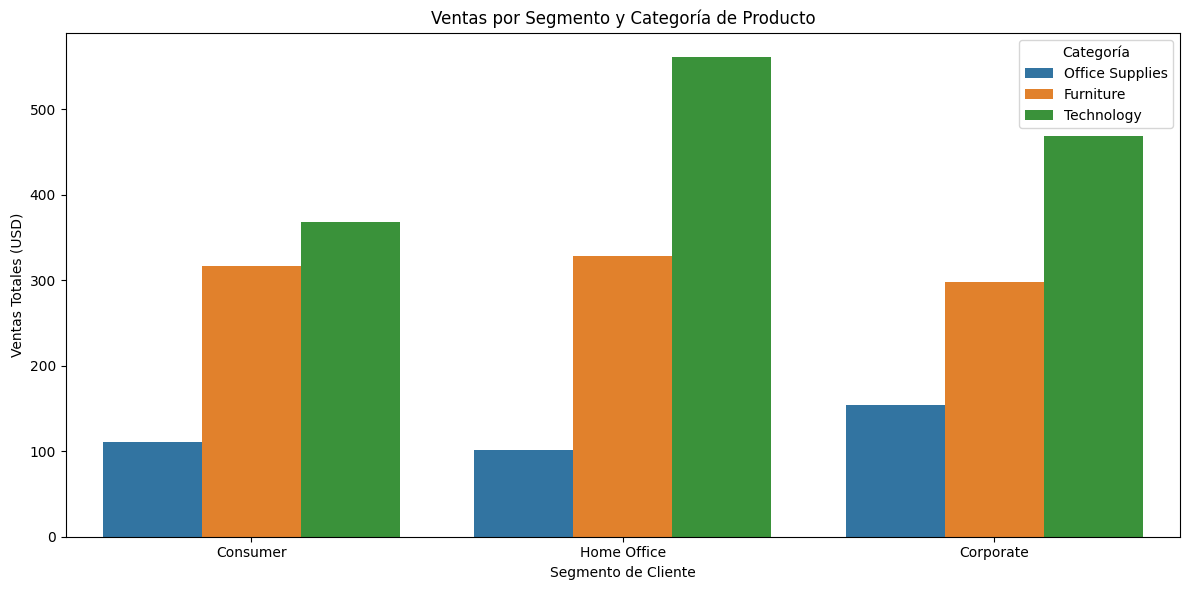

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocesamiento
df['Quarter'] = df['Order Date'].dt.to_period('Q').astype(str)

## Gráfico 1: Segmento vs Categoría vs Ventas
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Segment', y='Sales', hue='Category', ci=None)
plt.title('Ventas por Segmento y Categoría de Producto')
plt.ylabel('Ventas Totales (USD)')
plt.xlabel('Segmento de Cliente')
plt.legend(title='Categoría')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El primer gráfico muestra cómo varían las ventas según el segmento de clientes y la categoría de productos. Se observa que el segmento “Consumer” es el que genera mayores ventas totales, especialmente dentro de la categoría “Technology”. Esto sugiere que los consumidores individuales representan un mercado clave para los productos tecnológicos. En cambio, el segmento “Home Office” presenta un volumen de ventas considerablemente menor en todas las categorías, lo que indica que podría ser un nicho con menor demanda o menor capacidad de compra. Este análisis permite plantear estrategias de marketing segmentadas según el tipo de cliente, enfocando los esfuerzos donde hay mayor retorno.

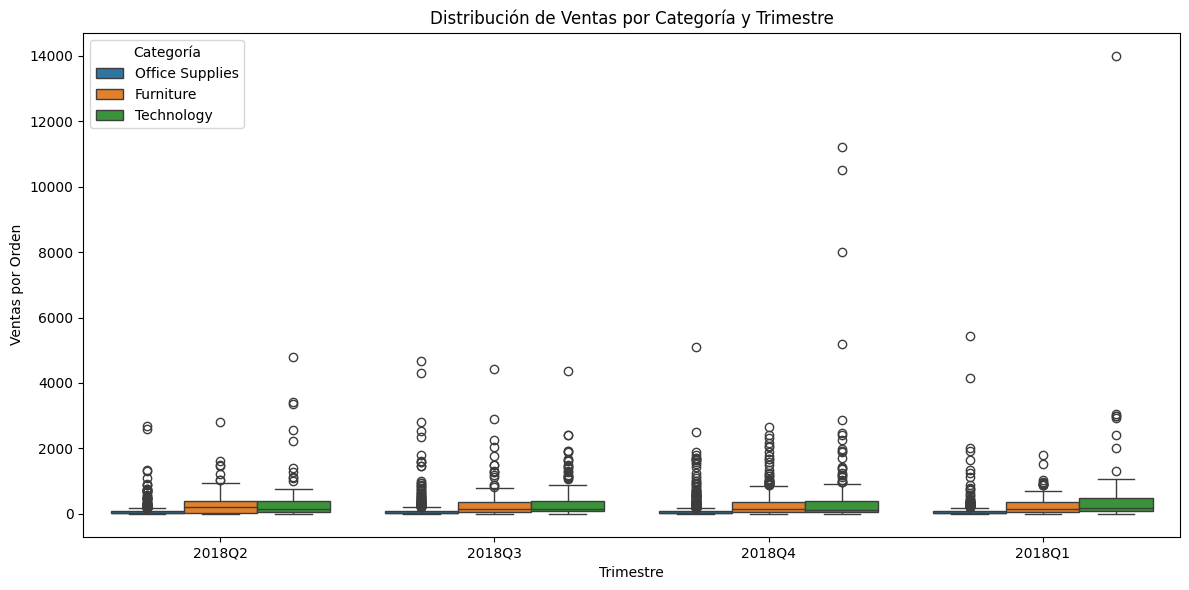

In [ ]:
## Gráfico 2: Categoría vs Trimestre vs Ventas promedio
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Quarter', y='Sales', hue='Category')
plt.title('Distribución de Ventas por Categoría y Trimestre')
plt.ylabel('Ventas por Orden')
plt.xlabel('Trimestre')
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()

En el segundo gráfico, se analiza la distribución de las ventas a lo largo del año agrupadas por trimestre y categoría. Se identifica un incremento en el volumen de ventas durante el cuarto trimestre (Q4), especialmente en la categoría “Technology”, que no solo muestra una mediana más alta sino también una mayor dispersión de los valores. Esto puede deberse a eventos comerciales de fin de año como el Black Friday o las compras navideñas, que suelen incentivar el consumo de tecnología. En contraste, la categoría “Office Supplies” mantiene una distribución más estable, sin grandes variaciones entre trimestres. Este comportamiento estacional puede ser clave a la hora de planificar campañas comerciales o asignar recursos en función del calendario.

<ipython-input-13-fab3ddff1115>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Ship Mode', y='Sales', hue='Category', ci=None)


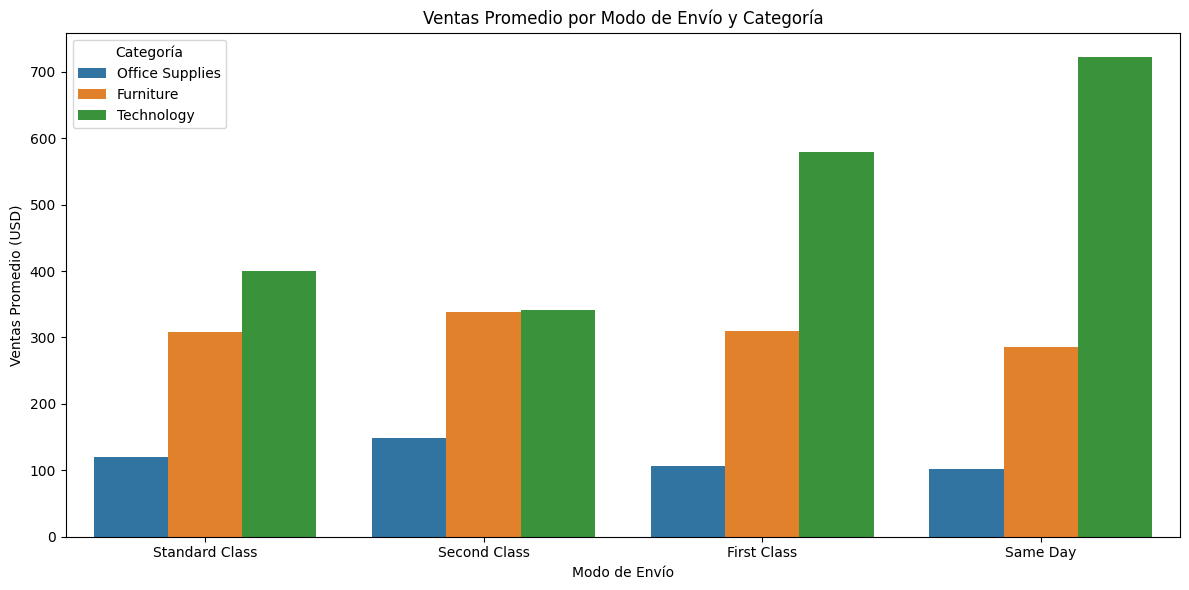

In [ ]:
## Gráfico 3: Modo de Envío vs Categoría vs Ventas promedio
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Ship Mode', y='Sales', hue='Category', ci=None)
plt.title('Ventas Promedio por Modo de Envío y Categoría')
plt.ylabel('Ventas Promedio (USD)')
plt.xlabel('Modo de Envío')
plt.legend(title='Categoría')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

El tercer gráfico examina la relación entre el modo de envío, la categoría del producto y el valor de las ventas. Se destaca que los pedidos enviados mediante el servicio “Same Day” tienden a estar asociados a ventas de mayor valor, particularmente en la categoría “Technology”. Esto sugiere que los clientes que adquieren productos costosos están más dispuestos a pagar por envíos rápidos. Por el contrario, el servicio de envío más utilizado, “Standard Class”, presenta montos de venta promedio más bajos, lo cual es esperable en productos menos urgentes o de menor costo. Este análisis permite entender cómo se comporta la logística en relación con el tipo de producto y su precio.

<ipython-input-14-6b535d793117>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='Sales', hue='Category', ci=None)


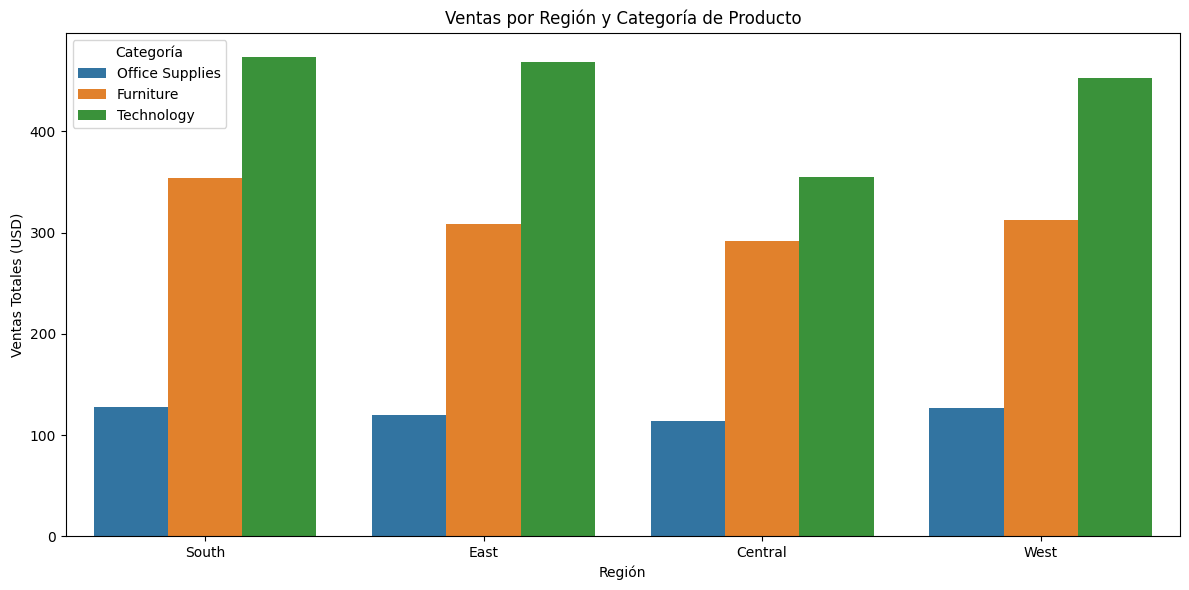

In [ ]:
## Gráfico 4: Ventas por Región y Categoría
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Region', y='Sales', hue='Category', ci=None)
plt.title('Ventas por Región y Categoría de Producto')
plt.ylabel('Ventas Totales (USD)')
plt.xlabel('Región')
plt.legend(title='Categoría')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Este gráfico muestra la distribución de las ventas según las distintas regiones del país y las categorías de productos. Se observa que la región West lidera en ventas de tecnología, mientras que la región East tiene un buen desempeño en todas las categorías. En contraste, South y Central presentan niveles más bajos. Este resultado sugiere que la ubicación geográfica es un factor a tener en cuenta para la planificación comercial y que la categoría “Technology” es especialmente fuerte en ciertas regiones.

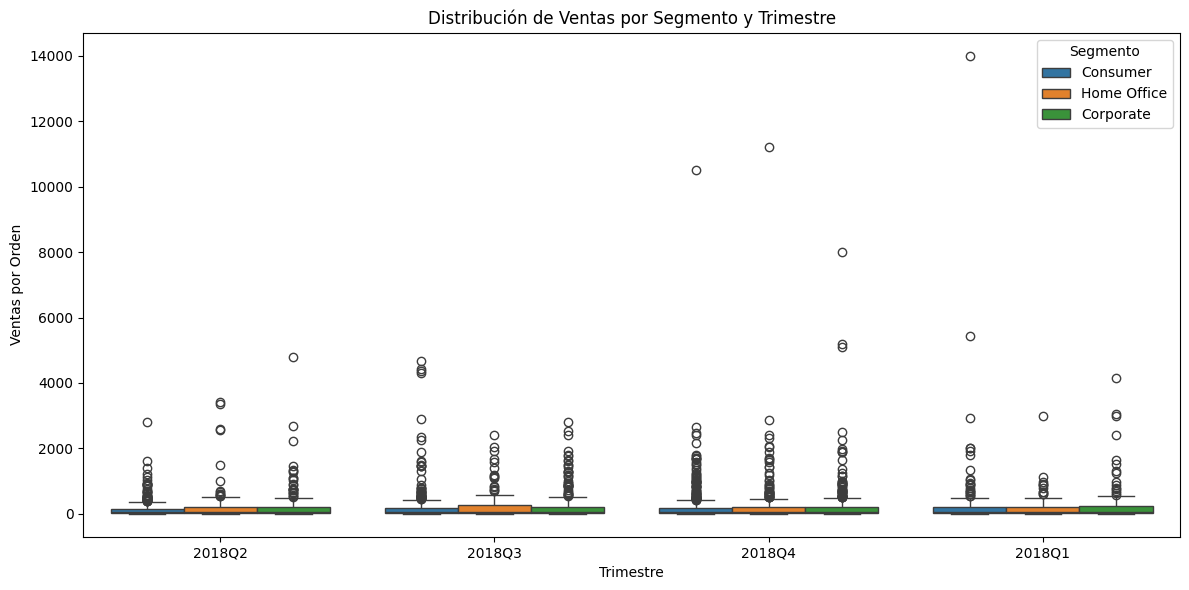

In [ ]:
## Gráfico 5: Distribución de Ventas por Segmento y Trimestre
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Quarter', y='Sales', hue='Segment')
plt.title('Distribución de Ventas por Segmento y Trimestre')
plt.ylabel('Ventas por Orden')
plt.xlabel('Trimestre')
plt.legend(title='Segmento')
plt.tight_layout()
plt.show()


Al analizar las ventas por segmento a lo largo del año, se confirma que el segmento Consumer mantiene un volumen constante pero muestra un aumento notorio en el cuarto trimestre. “Corporate” también incrementa su participación en ese período. Este comportamiento estacional refuerza la hipótesis sobre el impacto del último trimestre, pero además aporta una visión segmentada que permite ajustar campañas específicas por perfil de cliente.

<ipython-input-10-84568d00fbeb>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Ship Mode', y='Sales', hue='Segment', ci=None)


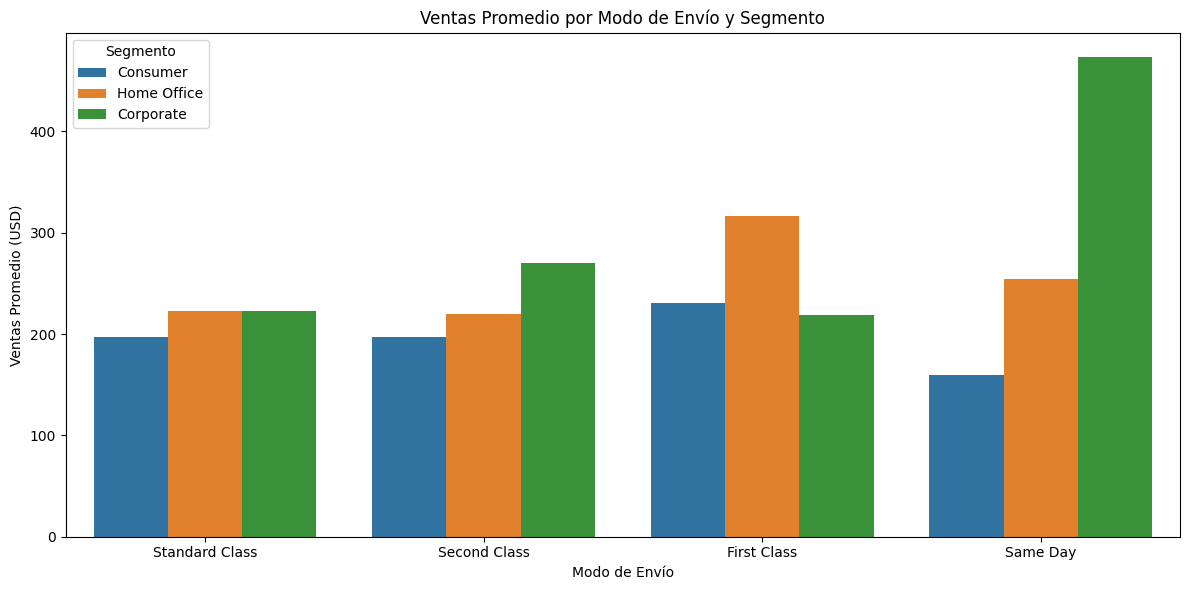

In [ ]:
## Gráfico 6: Ventas Promedio por Modo de Envío y Segmento
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Ship Mode', y='Sales', hue='Segment', ci=None)
plt.title('Ventas Promedio por Modo de Envío y Segmento')
plt.ylabel('Ventas Promedio (USD)')
plt.xlabel('Modo de Envío')
plt.legend(title='Segmento')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Finalmente, este gráfico revela que el envío en modalidad Same Day se asocia con mayores montos de venta promedio en todos los segmentos, aunque es más usado por el segmento “Consumer”. Esto refuerza la relación entre rapidez de entrega y valor de la compra, y muestra que ciertos perfiles de clientes están dispuestos a pagar más por urgencia.

# Vinculación con las hipótesis

El análisis exploratorio de las ventas realizadas por una supertienda global durante el año 2018 permitió evaluar con claridad las tres hipótesis propuestas al inicio del trabajo. En primer lugar, se buscó determinar si el segmento “Corporate” generaba mayores ventas en promedio que el segmento “Consumer”. Los resultados obtenidos, particularmente en el gráfico 1, mostraron lo contrario: el segmento “Consumer” lidera en ventas totales y es especialmente relevante en la categoría “Technology”. Este hallazgo permite refutar la hipótesis inicial y sugiere que los consumidores individuales representan un mercado prioritario en términos de ingresos generados.

La segunda hipótesis planteaba que la categoría “Technology” tendría mayores ingresos promedio por pedido que “Office Supplies”. Esta afirmación se ve confirmada en varios gráficos: los productos tecnológicos presentan un valor de transacción más alto, se asocian con envíos más costosos como “Same Day” (gráfico 3), y dominan en múltiples regiones (gráfico 4). Esto indica no solo una alta rentabilidad, sino también una disposición del cliente a invertir más en tecnología, lo cual es estratégico para definir líneas de producto prioritarias.

Por último, la tercera hipótesis afirmaba que las ventas aumentarían en el cuarto trimestre del año. Esta suposición se confirma claramente en los gráficos 2 y 5, donde se observa un incremento significativo en la mediana y variabilidad de las ventas hacia fin de año, tanto por categoría como por segmento. Esto valida la existencia de un comportamiento estacional marcado, posiblemente influenciado por eventos comerciales como el Black Friday, las compras navideñas o cierres fiscales.

En conjunto, los seis gráficos generados permitieron analizar desde diferentes ángulos cómo se comportan las ventas en función del tipo de cliente, la categoría del producto, la región, la época del año y el modo de entrega. Los resultados aportan evidencia empírica útil para la planificación comercial, el diseño de campañas de marketing estacionales, y la priorización de segmentos o categorías en función de su desempeño. Además, ofrecen una base sólida para futuras investigaciones sobre comportamiento de compra en entornos minoristas complejos.

# Selección de características (feature selection)



In [ ]:
# Reemplazar cualquier NaN residual por 0
X = X.fillna(0)

In [ ]:
# Verificar si aún hay NaNs
print(X.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Quarter         0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer

# Copiar dataset
df_model = df.copy()

# Eliminar columnas irrelevantes
df_model = df_model.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Ship Date',
                                  'Customer ID', 'Customer Name', 'Product ID', 'Product Name'])

# Codificar variables categóricas
for col in df_model.select_dtypes(include='object').columns:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Separar X e y
X = df_model.drop(columns=['Sales'])
y = df_model['Sales']

# Imputación de valores faltantes (por media)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Asegurarse de que no queden NaNs
X = X.fillna(0)

# Selección de las 5 mejores variables predictoras
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Mostrar nombres de variables seleccionadas
selected_features = X.columns[selector.get_support()]
print("Variables seleccionadas:", list(selected_features))

Variables seleccionadas: ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
